In [1]:
import pandas as pd
import numpy as np

In [2]:
%%markdown

# Read in initial data
# source: https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Pot-Holes-Reported/7as2-ds3y

## parse dates


# Read in initial data
# source: https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Pot-Holes-Reported/7as2-ds3y

## parse dates

In [3]:
date_columns = ['CREATION DATE', 'COMPLETION DATE']

data = pd.read_csv('data/311_Service_Requests_-_Pot_Holes_Reported.csv', parse_dates=date_columns)

In [4]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,1.173863e+06,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)"
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,1.150934e+06,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)"
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,1.159964e+06,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)"
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,1.172963e+06,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)"
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,1.175703e+06,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)"


In [5]:
## Add additional columns

data['COMPLETE'] = data['COMPLETION DATE'].notnull()
data['is_dupe'] = data['STATUS'].isin(['Completed - Dup', 'Open - Dup'])


In [6]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True


In [7]:
%%markdown

## Add time delta columns


## Add time delta columns

In [8]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True


In [9]:
data['WORK DURATION'] = data['COMPLETION DATE'] - data['CREATION DATE']
data['WAITING TIME'] = pd.to_datetime('today') - data['CREATION DATE']

In [10]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True,2 days,2659 days
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True,2 days,2659 days
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True,2 days,2659 days
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True,2 days,2659 days
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True,2 days,2659 days


In [11]:
data['WAITING TIME'] = np.where(data['COMPLETE'] == True, pd.NaT, data['WAITING TIME'])

In [12]:
data['WAITING TIME'] = pd.to_timedelta(data['WAITING TIME'])
data['WORK DURATION'] = pd.to_timedelta(data['WORK DURATION'])

In [13]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True,2 days,NaT
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True,2 days,NaT
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True,2 days,NaT
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True,2 days,NaT
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True,2 days,NaT


In [14]:
# remove duplicate requests

deduped = data[data['is_dupe'] == False]

In [15]:
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,22.0,72.0,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2 days,NaT
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,10.0,30.0,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2 days,NaT
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,6.0,69.0,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2 days,NaT
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,6.0,44.0,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2 days,NaT
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,6.0,44.0,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2 days,NaT


In [16]:
deduped.describe()

,NUMBER OF POTHOLES FILLED ON BLOCK,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,WORK DURATION,WAITING TIME
count,369664.000000,371327.000000,3.725810e+05,3.725810e+05,372692.000000,372691.000000,372692.000000,58678.000000,372173.000000,372173.000000,372153,726
mean,11.253768,60571.788680,1.160804e+06,1.889751e+06,24.895919,12.759466,36.432743,32.205341,41.852924,-87.685046,19 days 17:55:46.768667,17 days 08:49:35.206611
std,18.211201,1902.687006,1.744252e+04,3.515222e+04,14.124101,6.998023,23.353029,17.583863,0.137055,0.212967,33 days 09:23:03.955299,27 days 09:25:50.589063
min,0.000000,0.000000,1.092430e+06,1.813892e+06,0.000000,0.000000,0.000000,1.000000,0.000000,-87.936132,0 days 00:00:00,5 days 00:00:00
25%,1.000000,60618.000000,1.149336e+06,1.859897e+06,13.000000,8.000000,16.000000,20.000000,41.771033,-87.727366,1 days 00:00:00,7 days 00:00:00
50%,5.000000,60630.000000,1.161527e+06,1.894414e+06,24.000000,12.000000,31.000000,33.000000,41.866041,-87.682863,6 days 00:00:00,9 days 00:00:00
75%,14.000000,60643.000000,1.172913e+06,1.920100e+06,38.000000,18.000000,59.000000,47.000000,41.936871,-87.641526,22 days 00:00:00,18 days 00:00:00
max,320.000000,60827.000000,1.205133e+06,1.951593e+06,50.000000,31.000000,77.000000,69.000000,42.022960,0.000000,1194 days 00:00:00,351 days 00:00:00


In [17]:
## Let's plot some stuff

In [ ]:
# total potholes by zip code

# total potholes by income

# dupes by zip code

# dupes by income

In [49]:
total_by_zipcode = data.groupby(['ZIP'])[['ZIP']].count()

In [53]:
total_by_zipcode = total_by_zipcode.drop(0)

In [54]:
total_by_zipcode.head()

,ZIP
ZIP,
60601.0,2780
60602.0,665
60603.0,1054
60604.0,944
60605.0,2974


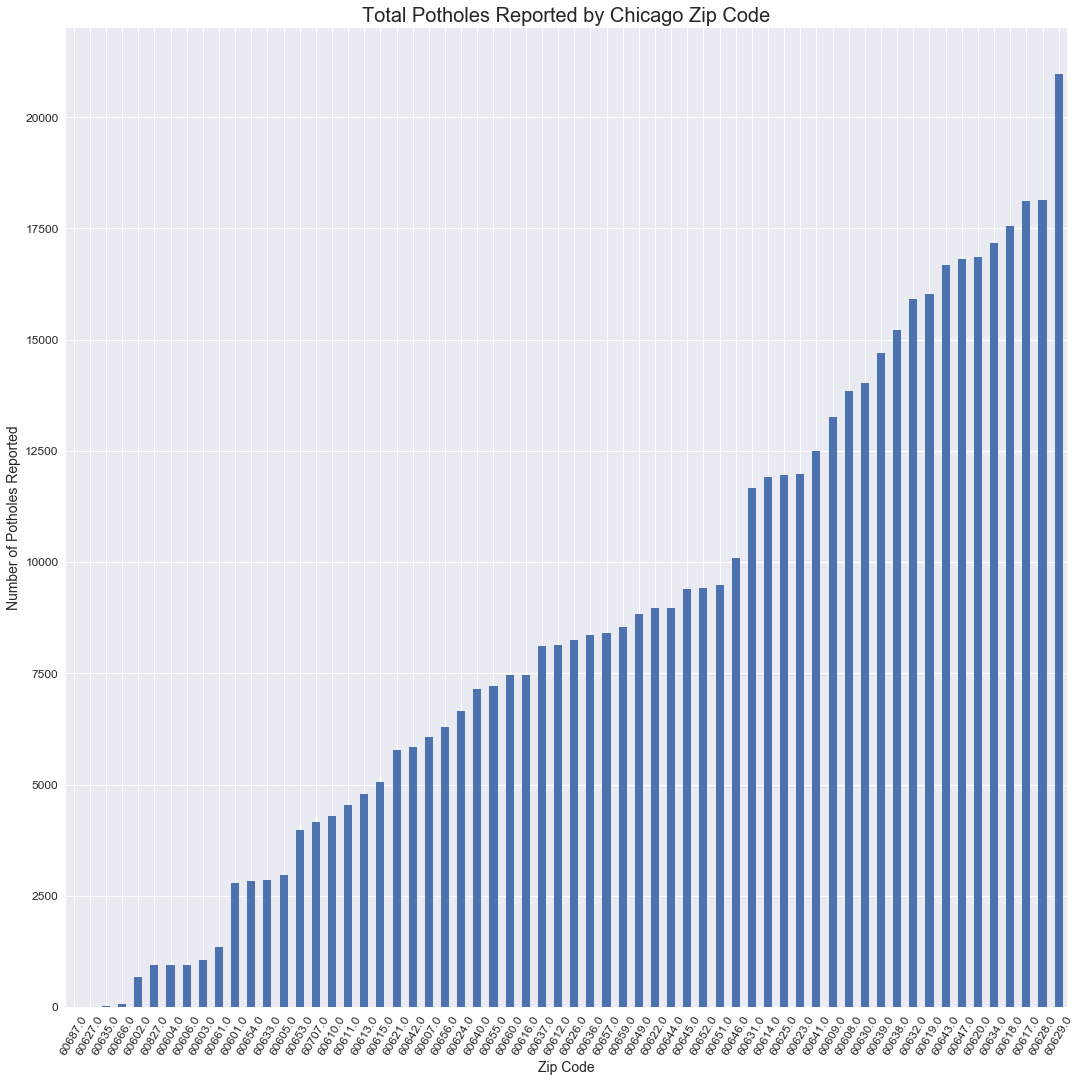

In [92]:
ax = total_by_zipcode.sort_values('ZIP').plot(sort_columns=True, kind='bar', figsize=(15, 15))

# ax.text(60, 70, "O'Hare Airport", ha='right', transform=ax.transData);
ax.legend_.remove()
ax.tick_params(labelsize=12);
ax.set_xlabel('Zip Code', fontsize=14);
ax.set_ylabel('Number of Potholes Reported', fontsize=14)
plt.xticks(rotation=60)
ax.set_title('Total Potholes Reported by Chicago Zip Code', fontsize=20);

ax.figure.tight_layout(pad=0.5, w_pad=20, h_pad=10.0)
ax.figure.savefig('total_poholes_by_zip.png')

In [63]:
deduped_by_zipcode = data[data['is_dupe'] == False].groupby(['ZIP'])[['ZIP']].count()

In [64]:
deduped_by_zipcode.head()

,ZIP
ZIP,
0.0,366
60601.0,2381
60602.0,556
60603.0,843
60604.0,591


In [66]:
deduped_by_zipcode = deduped_by_zipcode.drop(0)

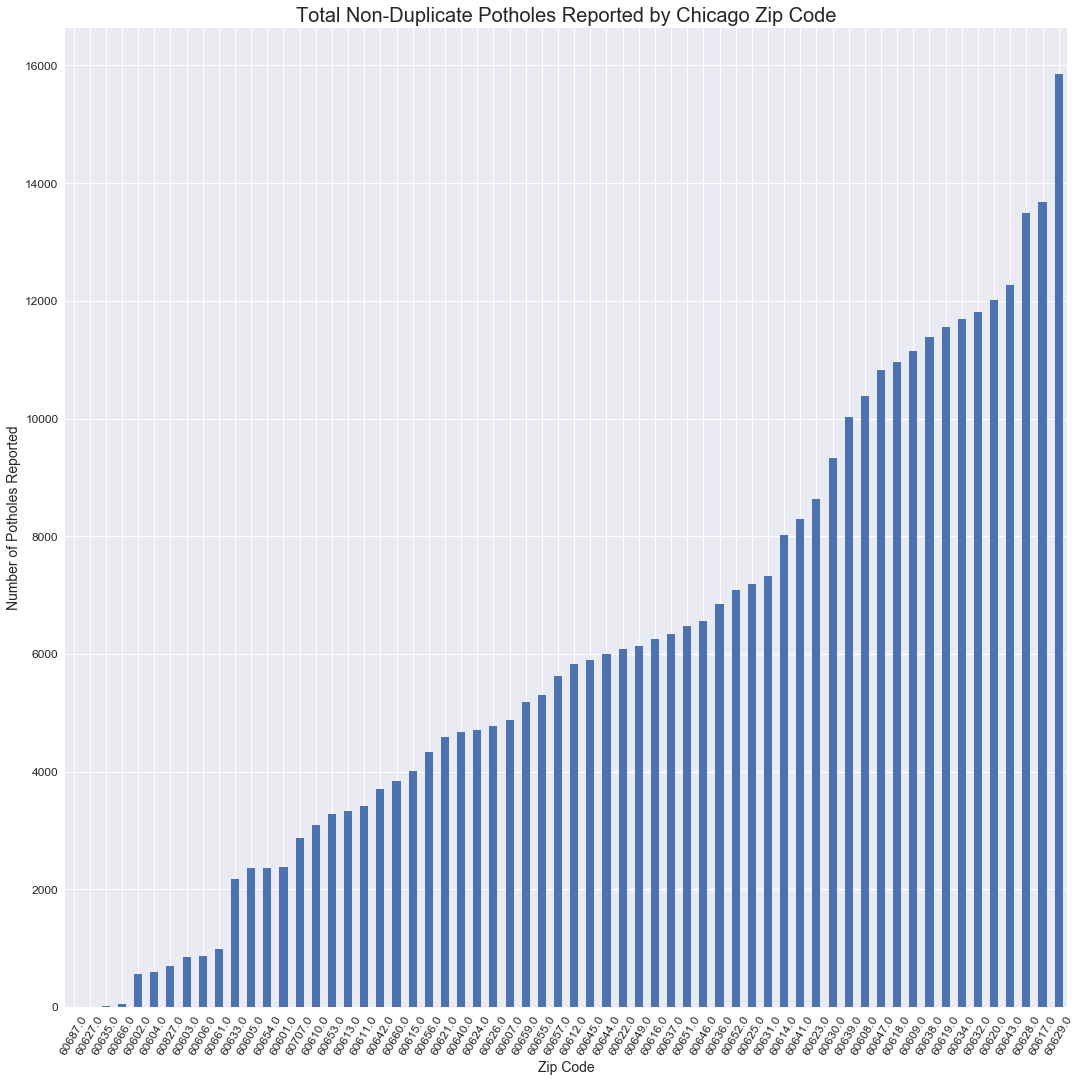

In [93]:
ax = deduped_by_zipcode.sort_values('ZIP').plot(sort_columns=True, kind='bar', figsize=(15, 15))

# ax.text(60, 70, "O'Hare Airport", ha='right', transform=ax.transData);
ax.legend_.remove()
ax.tick_params(labelsize=12);
ax.set_xlabel('Zip Code', fontsize=14);
ax.set_ylabel('Number of Potholes Reported', fontsize=14)
plt.xticks(rotation=60)
ax.set_title('Total Non-Duplicate Potholes Reported by Chicago Zip Code', fontsize=20);

ax.figure.tight_layout(pad=0.5, w_pad=20, h_pad=10.0)
ax.figure.savefig('total_nondupe_potholes_by_zip.png')

In [82]:
dupes_by_zipcode = data[data['is_dupe'] == True].groupby(['ZIP'])[['ZIP']].count()

In [70]:
dupes_by_zipcode.head()

,ZIP
ZIP,
0.0,310
60601.0,399
60602.0,109
60603.0,211
60604.0,353


In [86]:
dupes_by_zipcode = dupes_by_zipcode.drop(0)

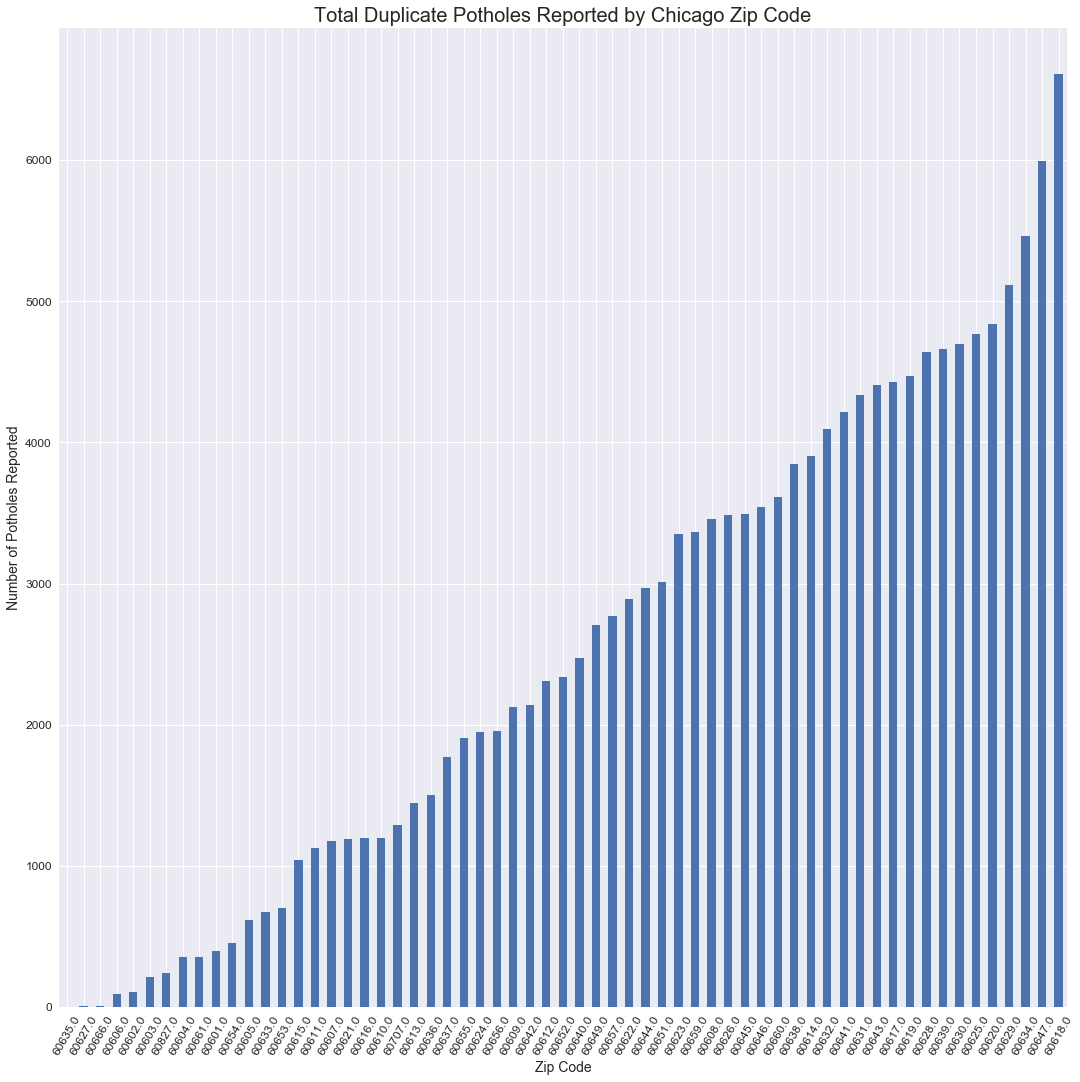

In [94]:
ax = dupes_by_zipcode.sort_values('ZIP').plot(sort_columns=True, kind='bar', figsize=(15, 15))

# ax.text(60, 70, "O'Hare Airport", ha='right', transform=ax.transData);
ax.legend_.remove()
ax.tick_params(labelsize=12);
ax.set_xlabel('Zip Code', fontsize=14);
ax.set_ylabel('Number of Potholes Reported', fontsize=14)
plt.xticks(rotation=60)
ax.set_title('Total Duplicate Potholes Reported by Chicago Zip Code', fontsize=20);

ax.figure.tight_layout(pad=0.5, w_pad=20, h_pad=10.0)
ax.figure.savefig('total_duplicate_potholes_by_zip.png')

In [18]:
# wait time

# work duration

# distribution by area code

# wait time by area code

# work duration by area code

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
def get_days(x):
    if type(x) == type(pd.NaT):
        return 0
    return x.days

In [19]:
# deduped['WAITING DAYS'] = deduped['WAITING TIME'].apply(get_days)
# deduped['WORK DAYS'] = deduped['WORK DURATION'].apply(get_days)

deduped['WAITING DAYS'] = deduped['WAITING TIME'].apply(get_days)
deduped['WORK DAYS'] = deduped['WORK DURATION'].apply(get_days)

/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME,WAITING DAYS,WORK DAYS
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2 days,NaT,0,2
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2 days,NaT,0,2
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2 days,NaT,0,2
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2 days,NaT,0,2
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2 days,NaT,0,2


In [21]:
deduped['WORK_DAYS'] = deduped['WORK DAYS']
deduped['mra'] = deduped['MOST RECENT ACTION']

deduped.query("COMPLETE == True and WORK_DAYS > 50")

/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME,WAITING DAYS,WORK DAYS,WORK_DAYS,mra
713,2011-01-03,Completed,2011-02-23,11-00005247,Pot Hole in Street,Dispatch Crew,Pothole Patched,39.0,7199 N OAKLEY AVE,60645.0,...,-87.688019,"(42.01219913703694, -87.68801943579926)",True,False,51 days,NaT,0,51,51,Pothole Patched
2805,2011-01-06,Completed,2011-06-02,11-00026374,Pot Hole in Street,Dispatch Crew,Pothole Patched,NaN,3948 N OKETO AVE,60634.0,...,-87.812368,"(41.952011695214054, -87.81236781183173)",True,False,147 days,NaT,0,147,147,Pothole Patched
3604,2012-01-08,Completed,2012-07-03,12-00032815,Pot Hole in Street,Dispatch Crew,No Problem Found,NaN,1900 W 33RD PL,60608.0,...,NaN,NaN,True,False,177 days,NaT,0,177,177,No Problem Found
5937,2012-01-11,Completed,2012-03-13,12-00050436,Pot Hole in Street,Dispatch Crew,Completed,NaN,7000 W FOREST PRESERVE AVE,0.0,...,-87.801502,"(41.95675769433997, -87.80150226513415)",True,False,62 days,NaT,0,62,62,Completed
6211,2009-01-12,Completed,2011-10-06,09-00061329,Pot Hole in Street,Dispatch Crew,Pothole Patched,33.0,2519 S HALSTED ST,60608.0,...,-87.646321,"(41.84645996932382, -87.64632066769741)",True,False,997 days,NaT,0,997,997,Pothole Patched
11289,2012-01-23,Completed,2012-04-11,12-00097410,Pot Hole in Street,Dispatch Crew,NaN,NaN,424 S AUSTIN BLVD,NaN,...,-87.774594,"(41.87404777133902, -87.7745940746947)",True,False,79 days,NaT,0,79,79,NaN
11690,2011-01-24,Completed,2011-04-04,11-00111826,Pot Hole in Street,Dispatch Crew,Pothole Patched,2.0,5837 S ARCHER AVE,60638.0,...,-87.760072,"(41.79595856748336, -87.76007185929173)",True,False,70 days,NaT,0,70,70,Pothole Patched
13510,2011-01-26,Completed,2011-04-07,11-00128214,Pot Hole in Street,Dispatch Crew,Pothole Patched,15.0,3800 W ACCESS ST,60623.0,...,-87.719355,"(41.83292488872132, -87.71935462461963)",True,False,71 days,NaT,0,71,71,Pothole Patched
14106,2011-01-27,Completed,2011-05-06,11-00135944,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,3436 N OSCEOLA AVE,60634.0,...,-87.813168,"(41.94254335048102, -87.81316800251847)",True,False,99 days,NaT,0,99,99,Pothole Patched
14545,2011-01-28,Completed,2011-04-07,11-00139482,Pot Hole in Street,Dispatch Crew,Pothole Patched,8.0,1300 W BALMORAL AVE,60640.0,...,-87.662512,"(41.980043028017356, -87.66251241729341)",True,False,69 days,NaT,0,69,69,Pothole Patched


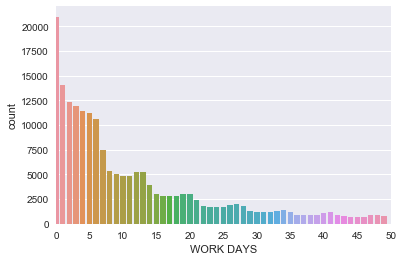

In [24]:
ax = sns.countplot(deduped.query('COMPLETE == True and WORK_DAYS <= 50 and WORK_DAYS > 0 and mra == "Pothole Patched"')['WORK DAYS'], 
                  )
ax.set_xlim(0, 50);
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_formatter(plt.ScalarFormatter());

In [25]:
mean_by_zip = deduped[deduped['COMPLETE'] == True].groupby('ZIP')[['WORK DAYS']].mean()

In [26]:
count_by_zip = deduped[deduped['COMPLETE'] == True].groupby('ZIP').size()

In [27]:
type(mean_by_zip)

pandas.core.frame.DataFrame

In [28]:
mean_by_zip.head()

,WORK DAYS
ZIP,
0.0,30.375342
60601.0,12.482353
60602.0,8.982014
60603.0,10.645314
60604.0,9.094915


In [29]:
mean_by_zip.index = mean_by_zip.index.astype('int')

In [30]:
# drop "0" area code
mean_by_zip = mean_by_zip.drop(0)

In [31]:
mean_by_zip.head()

,WORK DAYS
ZIP,
60601,12.482353
60602,8.982014
60603,10.645314
60604,9.094915
60605,15.817487


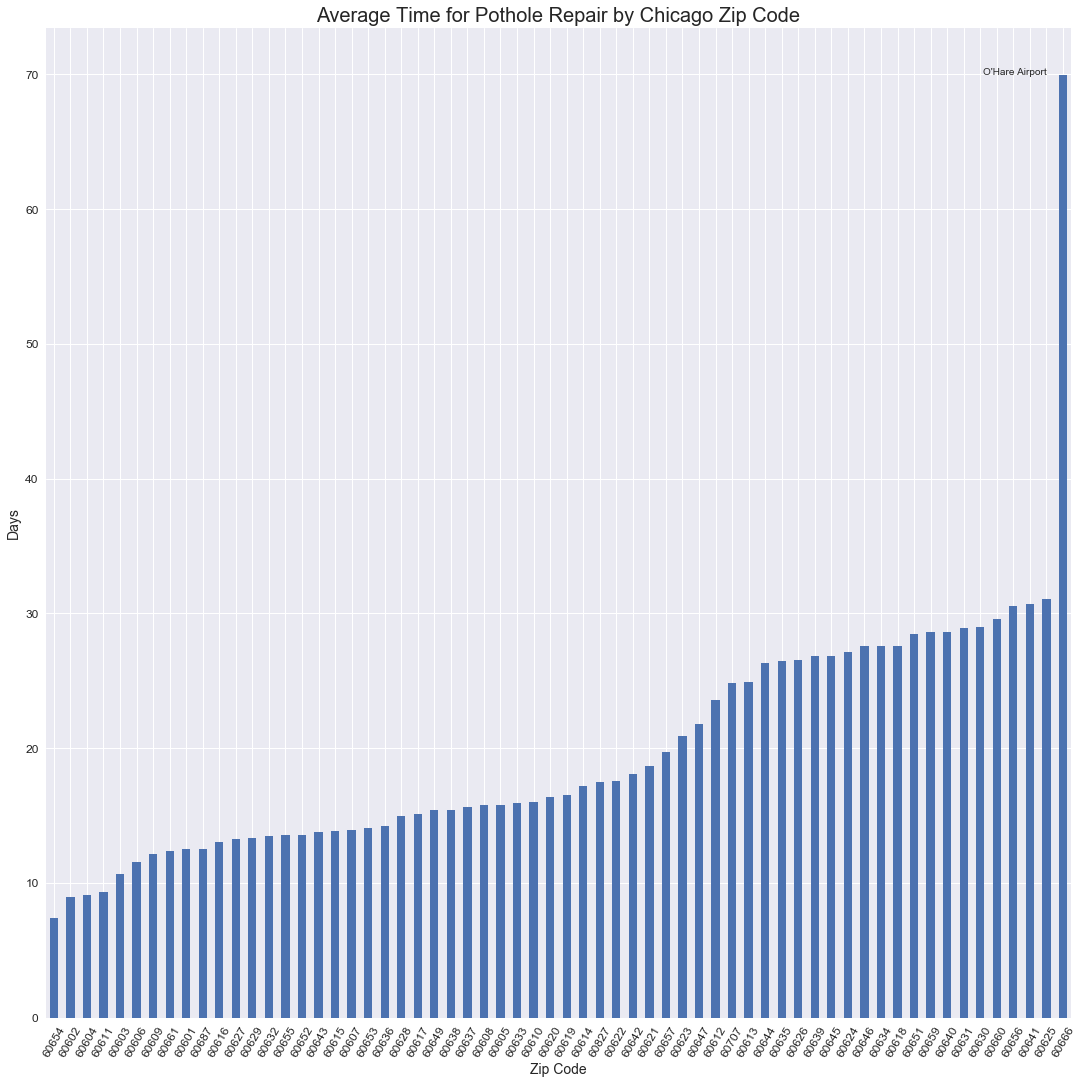

In [32]:
ax = mean_by_zip.sort_values('WORK DAYS').plot(sort_columns=True, kind='bar', figsize=(15, 15))

ax.text(60, 70, "O'Hare Airport", ha='right', transform=ax.transData);
ax.legend_.remove()
ax.tick_params(labelsize=12);
ax.set_xlabel('Zip Code', fontsize=14);
ax.set_ylabel('Days', fontsize=14)
plt.xticks(rotation=60)
ax.set_title('Average Time for Pothole Repair by Chicago Zip Code', fontsize=20);

ax.figure.tight_layout(pad=0.5, w_pad=20, h_pad=10.0)
ax.figure.savefig('pothole_time_by_zip.png')

In [33]:
ax.set_xlabel?

In [22]:
## load income data
# source https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi
income = pd.read_csv('data/15zpallagi.csv', usecols=['zipcode', 'N1', 'N02650', 'A02650', 'A01000', 'N01000'])

In [23]:
income.head(20)

,zipcode,N1,N02650,A02650,N01000,A01000
0,0,836320.0,836310.0,11036309.0,35620.0,34276.0
1,0,494830.0,494830.0,17960153.0,31610.0,66922.0
2,0,261250.0,261250.0,16216787.0,32230.0,100439.0
3,0,166690.0,166690.0,14588959.0,27830.0,126599.0
4,0,212660.0,212670.0,28985528.0,59400.0,513050.0
5,0,55360.0,55360.0,25509193.0,32020.0,2485448.0
6,35004,1490.0,1490.0,19279.0,50.0,10.0
7,35004,1350.0,1350.0,50786.0,80.0,67.0
8,35004,970.0,970.0,60315.0,70.0,144.0
9,35004,620.0,620.0,54301.0,80.0,295.0


In [24]:
income.rename(columns={'A02650': 'total_income_amount', 
                       'N02650': 'num_with_income', 
                       'N1': 'num_of_returns',
                       'A01000': 'total_capital_gains',
                       'N01000': 'num_with_capital_gains'}, inplace=True)
income

,zipcode,num_of_returns,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains
0,0,836320.0,836310.0,11036309.0,35620.0,34276.0
1,0,494830.0,494830.0,17960153.0,31610.0,66922.0
2,0,261250.0,261250.0,16216787.0,32230.0,100439.0
3,0,166690.0,166690.0,14588959.0,27830.0,126599.0
4,0,212660.0,212670.0,28985528.0,59400.0,513050.0
5,0,55360.0,55360.0,25509193.0,32020.0,2485448.0
6,35004,1490.0,1490.0,19279.0,50.0,10.0
7,35004,1350.0,1350.0,50786.0,80.0,67.0
8,35004,970.0,970.0,60315.0,70.0,144.0
9,35004,620.0,620.0,54301.0,80.0,295.0


In [25]:
"{}% have income".format(income['num_with_income'].sum()/ income['num_of_returns'].sum() * 100)

'99.99985369629174% have income'

In [26]:
income_by_zipcode = income.groupby('zipcode')[['num_with_income', 'total_income_amount', 
                                               'num_with_capital_gains', 'total_capital_gains']].sum()
income_by_zipcode.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains
zipcode,,,,
0,146918030.0,1.034457e+10,23402940.0,570865955.0
1001,8950.0,5.047740e+05,1260.0,6717.0
1002,9670.0,7.964750e+05,2950.0,57274.0
1005,2300.0,1.383090e+05,330.0,2124.0
1007,7490.0,5.375090e+05,1300.0,10447.0


In [27]:
income_by_zipcode['avg_income'] = income_by_zipcode['total_income_amount'] * 1000 / income_by_zipcode['num_with_income']
income_by_zipcode['avg_capital_gains'] = income_by_zipcode['total_capital_gains'] * 1000 / income_by_zipcode['num_with_capital_gains']
income_by_zipcode['avg_income'] = income_by_zipcode['avg_income'].astype(int)
income_by_zipcode.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
0,146918030.0,1.034457e+10,23402940.0,570865955.0,70410,24392.916232
1001,8950.0,5.047740e+05,1260.0,6717.0,56399,5330.952381
1002,9670.0,7.964750e+05,2950.0,57274.0,82365,19414.915254
1005,2300.0,1.383090e+05,330.0,2124.0,60134,6436.363636
1007,7490.0,5.375090e+05,1300.0,10447.0,71763,8036.153846


In [40]:
income_by_zipcode.loc[income_by_zipcode['avg_income'].idxmax()]

num_with_income               220.00
total_income_amount        561790.00
num_with_capital_gains        160.00
total_capital_gains        186977.00
avg_income                2553590.00
avg_capital_gains         1168606.25
Name: 33109, dtype: float64

In [41]:
income_by_zipcode.sort_values('avg_income', ascending=False)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
94104,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05
10577,1610.0,1585609.0,980.0,373087.0,984850,3.807010e+05
19035,2020.0,1951274.0,1390.0,249193.0,965977,1.792755e+05
90067,3280.0,3007211.0,2020.0,743083.0,916832,3.678629e+05
60043,1220.0,1061793.0,850.0,202511.0,870322,2.382482e+05


In [42]:
income_by_zipcode.sort_values('avg_capital_gains', ascending=False)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
7102,4400.0,781441.0,230.0,486407.0,177600,2.114813e+06
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
83014,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
23219,2230.0,423980.0,350.0,277331.0,190125,7.923743e+05
60604,620.0,349923.0,260.0,194197.0,564391,7.469115e+05


In [43]:
# % with more capital gains than income

more_capital_gains = income_by_zipcode[income_by_zipcode['avg_capital_gains'] > income_by_zipcode['avg_income']]

"{}% have higher capital gains".format(more_capital_gains.shape[0] * 100 / income_by_zipcode.shape[0])

'0.3395585738539898% have higher capital gains'

In [44]:
income_by_zipcode.loc[94122]

num_with_income           3.258000e+04
total_income_amount       2.992086e+06
num_with_capital_gains    9.170000e+03
total_capital_gains       1.797540e+05
avg_income                9.183800e+04
avg_capital_gains         1.960240e+04
Name: 94122, dtype: float64

In [45]:
income_by_zipcode.loc[92024]

num_with_income           2.509000e+04
total_income_amount       3.648563e+06
num_with_capital_gains    9.210000e+03
total_capital_gains       4.236700e+05
avg_income                1.454190e+05
avg_capital_gains         4.600109e+04
Name: 92024, dtype: float64

In [46]:
income_by_zipcode.loc[91942]

num_with_income           1.969000e+04
total_income_amount       1.141662e+06
num_with_capital_gains    2.900000e+03
total_capital_gains       1.840000e+04
avg_income                5.798100e+04
avg_capital_gains         6.344828e+03
Name: 91942, dtype: float64

In [47]:
income_by_zipcode.loc[11220]

num_with_income           5.427000e+04
total_income_amount       1.561786e+06
num_with_capital_gains    2.740000e+03
total_capital_gains       1.992400e+04
avg_income                2.877800e+04
avg_capital_gains         7.271533e+03
Name: 11220, dtype: float64

In [48]:
income_by_zipcode.loc[11226]

num_with_income           5.227000e+04
total_income_amount       2.035925e+06
num_with_capital_gains    2.640000e+03
total_capital_gains       3.084500e+04
avg_income                3.895000e+04
avg_capital_gains         1.168371e+04
Name: 11226, dtype: float64

In [76]:
income_by_zipcode.loc[60601]

num_with_income           7.560000e+03
total_income_amount       1.664704e+06
num_with_capital_gains    2.850000e+03
total_capital_gains       2.239120e+05
avg_income                2.201980e+05
avg_capital_gains         7.856561e+04
Name: 60601, dtype: float64

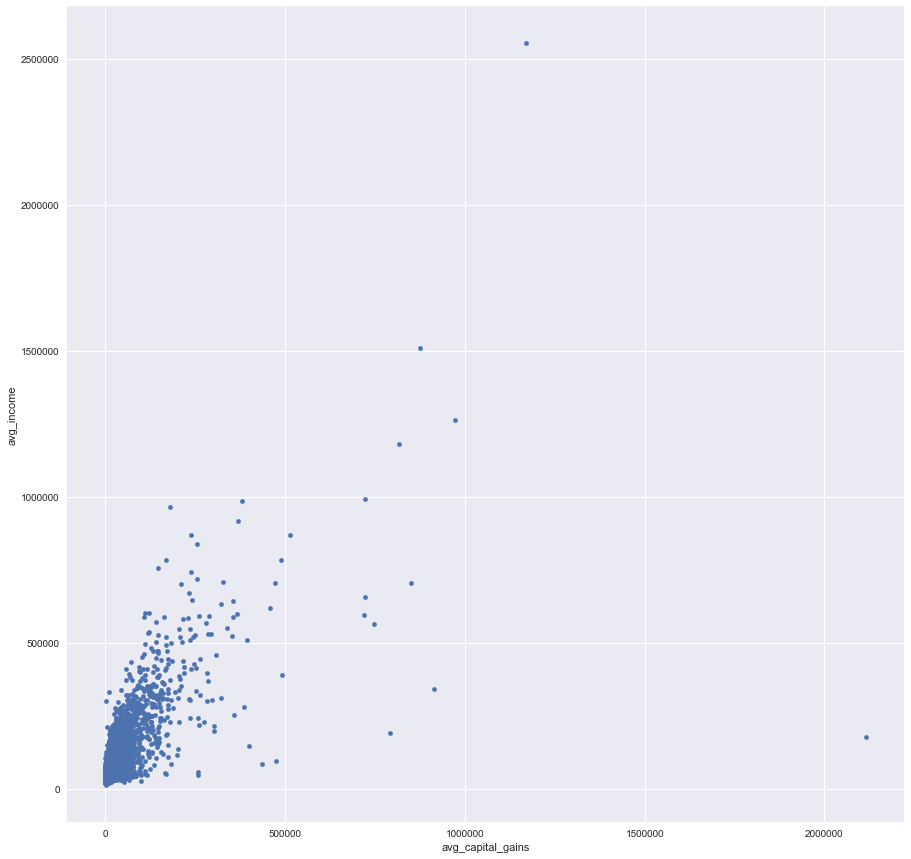

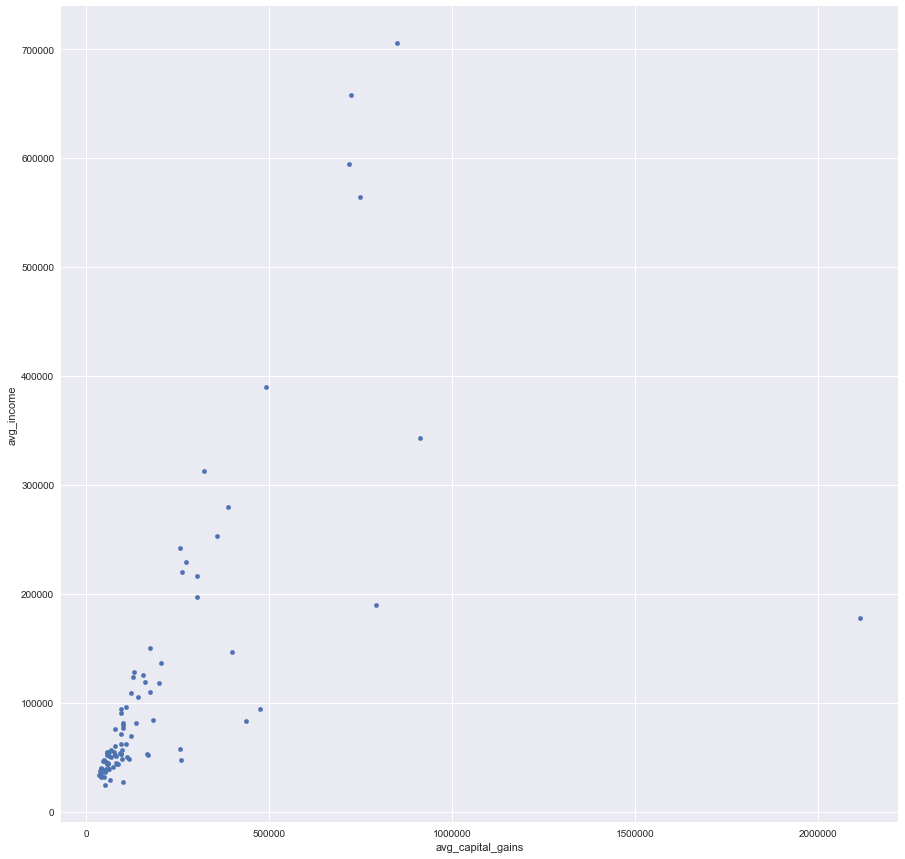

In [49]:
# capital gains vs income

income_by_zipcode.plot('avg_capital_gains', 'avg_income', 'scatter', figsize=(15, 15));
more_capital_gains.plot('avg_capital_gains', 'avg_income', 'scatter', figsize=(15, 15));

In [50]:
## join by zipcode to pothole dataset

In [51]:
mean_by_zip.head()

,WORK DAYS
ZIP,
60601,12.482353
60602,8.982014
60603,10.645314
60604,9.094915
60605,15.817487


In [52]:
income_by_zipcode.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
0,146918030.0,1.034457e+10,23402940.0,570865955.0,70410,24392.916232
1001,8950.0,5.047740e+05,1260.0,6717.0,56399,5330.952381
1002,9670.0,7.964750e+05,2950.0,57274.0,82365,19414.915254
1005,2300.0,1.383090e+05,330.0,2124.0,60134,6436.363636
1007,7490.0,5.375090e+05,1300.0,10447.0,71763,8036.153846


In [53]:
work_joined = pd.merge(mean_by_zip, income_by_zipcode, left_index=True, right_index=True)

In [54]:
work_joined.head()

,WORK DAYS,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60601,12.482353,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60602,8.982014,1270.0,408783.0,610.0,160883.0,321876,263742.622951
60603,10.645314,1400.0,651778.0,910.0,132411.0,465555,145506.593407
60604,9.094915,620.0,349923.0,260.0,194197.0,564391,746911.538462
60605,15.817487,13420.0,1802855.0,4260.0,117039.0,134340,27473.943662


In [55]:
work_joined.shape

(58, 7)

In [56]:
work_joined.sort_values('avg_income', ascending=False)

,WORK DAYS,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60604,9.094915,620.0,349923.0,260.0,194197.0,564391,746911.538462
60603,10.645314,1400.0,651778.0,910.0,132411.0,465555,145506.593407
60611,9.352253,19300.0,8038373.0,8720.0,1910728.0,416496,219120.183486
60602,8.982014,1270.0,408783.0,610.0,160883.0,321876,263742.622951
60606,11.517361,2520.0,786865.0,1100.0,155805.0,312248,141640.909091
60601,12.482353,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60614,17.157487,36730.0,7920337.0,14350.0,1859581.0,215636,129587.526132
60654,7.370934,11800.0,2338773.0,4860.0,467125.0,198201,96116.255144
60610,16.035378,22890.0,3805165.0,7970.0,740296.0,166237,92885.319950
60661,12.369060,6780.0,994123.0,1960.0,48929.0,146625,24963.775510


In [78]:
import matplotlib
matplotlib.style.available

['seaborn-dark-palette',
 'seaborn-pastel',
 'grayscale',
 '_classic_test',
 'seaborn-poster',
 'seaborn',
 'seaborn-ticks',
 'bmh',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-muted',
 'seaborn-dark',
 'dark_background',
 'fast',
 'classic',
 'ggplot',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-talk',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-paper',
 'tableau-colorblind10']

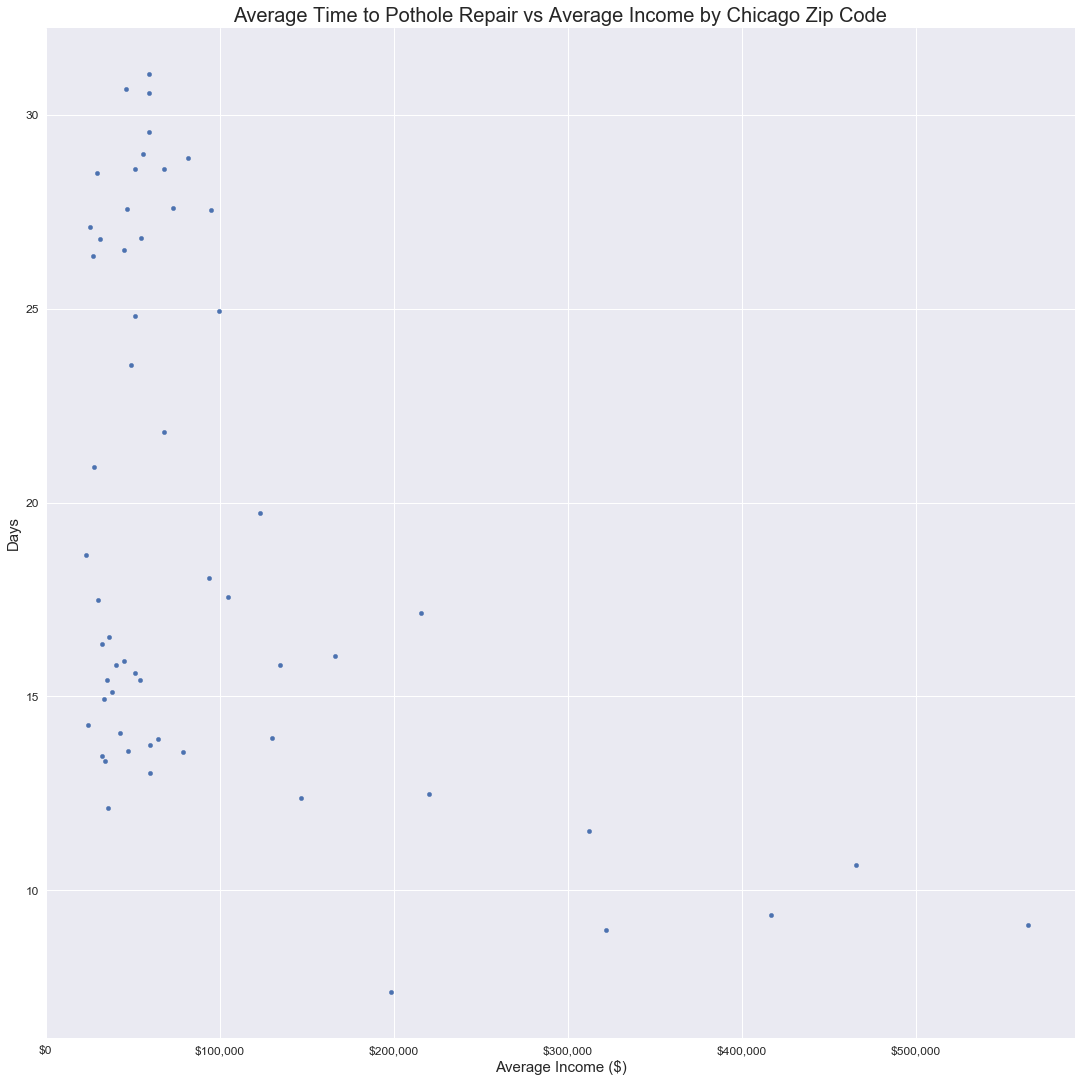

In [58]:
# with plt.style.context('dark_background'):
#     work_joined.plot('avg_income', 'WORK DAYS', 'scatter', figsize=(10,10));

sns.set()
ax = work_joined.plot('avg_income', 'WORK DAYS', 'scatter', figsize=(15,15));
ax.set_title('Average Time to Pothole Repair vs Average Income by Chicago Zip Code', fontsize=20)
ax.set_xlabel('Average Income ($)', fontsize=15)
ax.set_ylabel('Days', fontsize=15)
ax.tick_params(labelsize=12);
ax.set_xlim(left=0);
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')));
ax.figure.tight_layout(pad=0.5);
ax.figure.savefig('pothole_time_vs_income.png');

In [73]:
total_by_zipcode.head()

,ZIP
ZIP,
60601.0,2780
60602.0,665
60603.0,1054
60604.0,944
60605.0,2974


In [74]:
total_by_zipcode_with_income = pd.merge(total_by_zipcode, income_by_zipcode, left_index=True, right_index=True)

In [75]:
total_by_zipcode_with_income.head()

,ZIP,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60601,2780,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60602,665,1270.0,408783.0,610.0,160883.0,321876,263742.622951
60603,1054,1400.0,651778.0,910.0,132411.0,465555,145506.593407
60604,944,620.0,349923.0,260.0,194197.0,564391,746911.538462
60605,2974,13420.0,1802855.0,4260.0,117039.0,134340,27473.943662


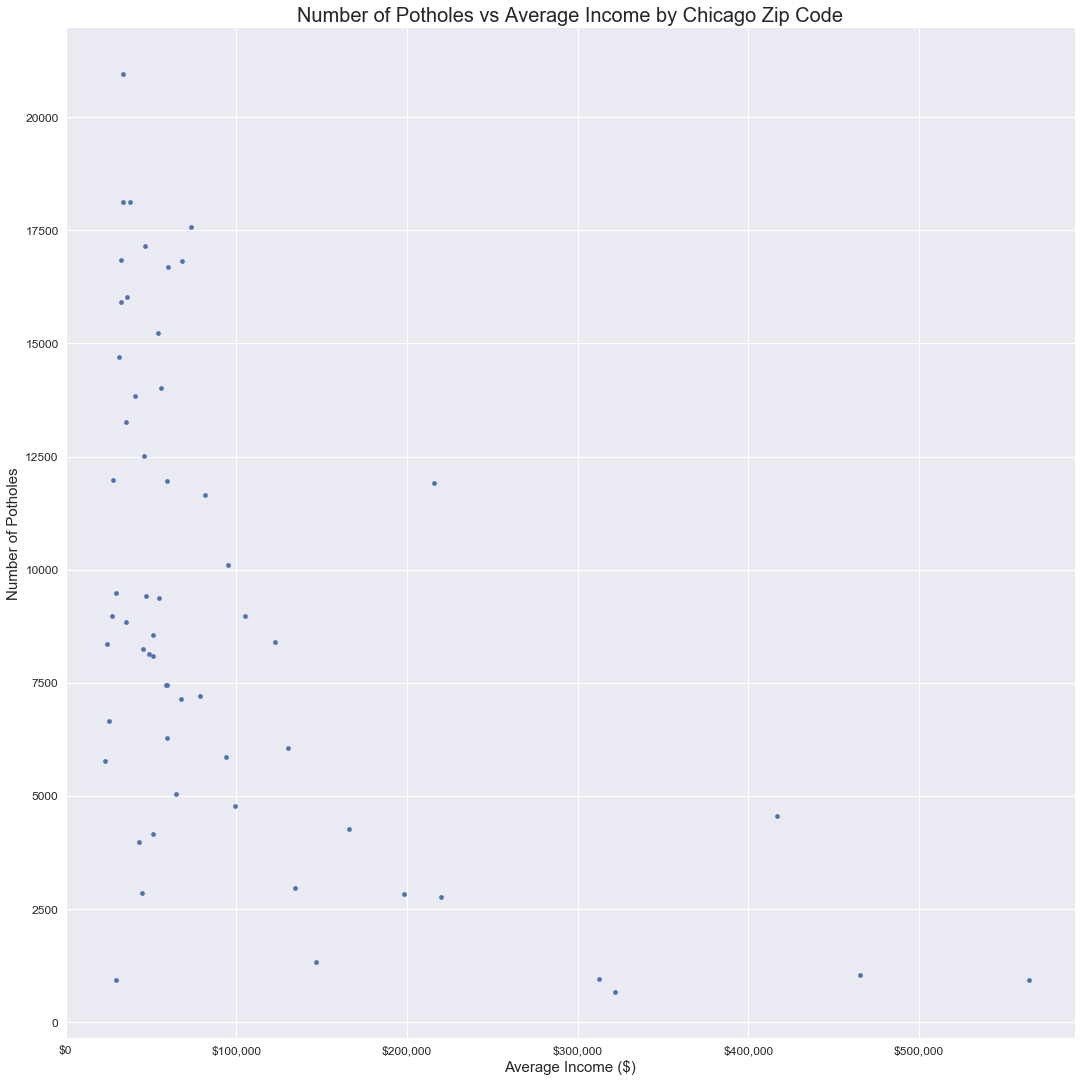

In [95]:
sns.set()
ax = total_by_zipcode_with_income.plot('avg_income', 'ZIP', 'scatter', figsize=(15,15));
ax.set_title('Number of Potholes vs Average Income by Chicago Zip Code', fontsize=20)
ax.set_xlabel('Average Income ($)', fontsize=15)
ax.set_ylabel('Number of Potholes', fontsize=15)
ax.tick_params(labelsize=12);
ax.set_xlim(left=0);
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')));
ax.figure.tight_layout(pad=0.5);
ax.figure.savefig('total_potholes_vs_income.png');

In [87]:
deduped_by_zipcode_with_income = pd.merge(deduped_by_zipcode, income_by_zipcode, left_index=True, right_index=True)

dupes_by_zipcode_with_income = pd.merge(dupes_by_zipcode, income_by_zipcode, left_index=True, right_index=True)

In [88]:
deduped_by_zipcode_with_income.head()

,ZIP,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60601,2381,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60602,556,1270.0,408783.0,610.0,160883.0,321876,263742.622951
60603,843,1400.0,651778.0,910.0,132411.0,465555,145506.593407
60604,591,620.0,349923.0,260.0,194197.0,564391,746911.538462
60605,2358,13420.0,1802855.0,4260.0,117039.0,134340,27473.943662


In [89]:
dupes_by_zipcode_with_income.head()

,ZIP,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60601,399,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60602,109,1270.0,408783.0,610.0,160883.0,321876,263742.622951
60603,211,1400.0,651778.0,910.0,132411.0,465555,145506.593407
60604,353,620.0,349923.0,260.0,194197.0,564391,746911.538462
60605,616,13420.0,1802855.0,4260.0,117039.0,134340,27473.943662


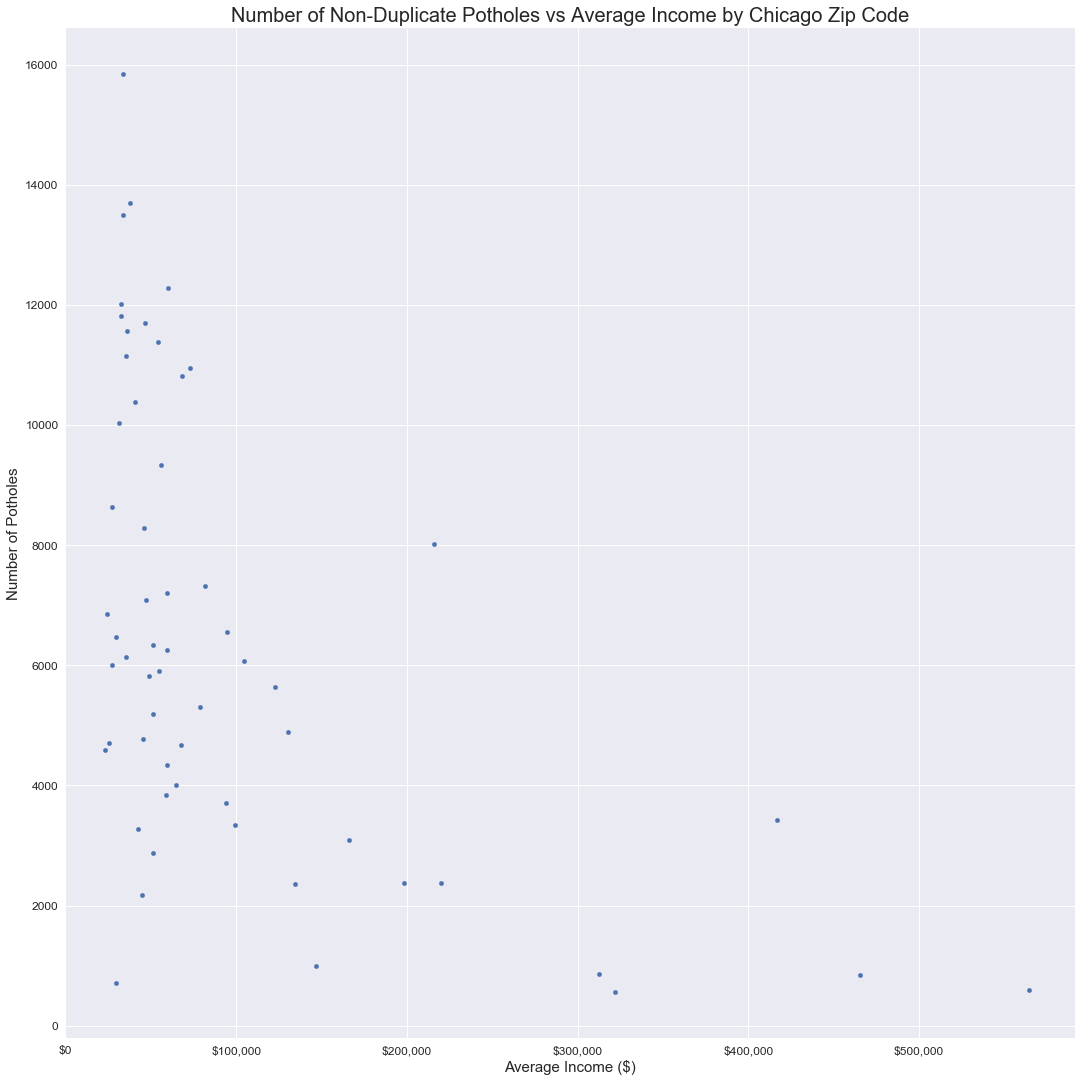

In [96]:
ax = deduped_by_zipcode_with_income.plot('avg_income', 'ZIP', 'scatter', figsize=(15,15));
ax.set_title('Number of Non-Duplicate Potholes vs Average Income by Chicago Zip Code', fontsize=20)
ax.set_xlabel('Average Income ($)', fontsize=15)
ax.set_ylabel('Number of Potholes', fontsize=15)
ax.tick_params(labelsize=12);
ax.set_xlim(left=0);
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')));
ax.figure.tight_layout(pad=0.5);
ax.figure.savefig('nondupe_potholes_vs_income.png');

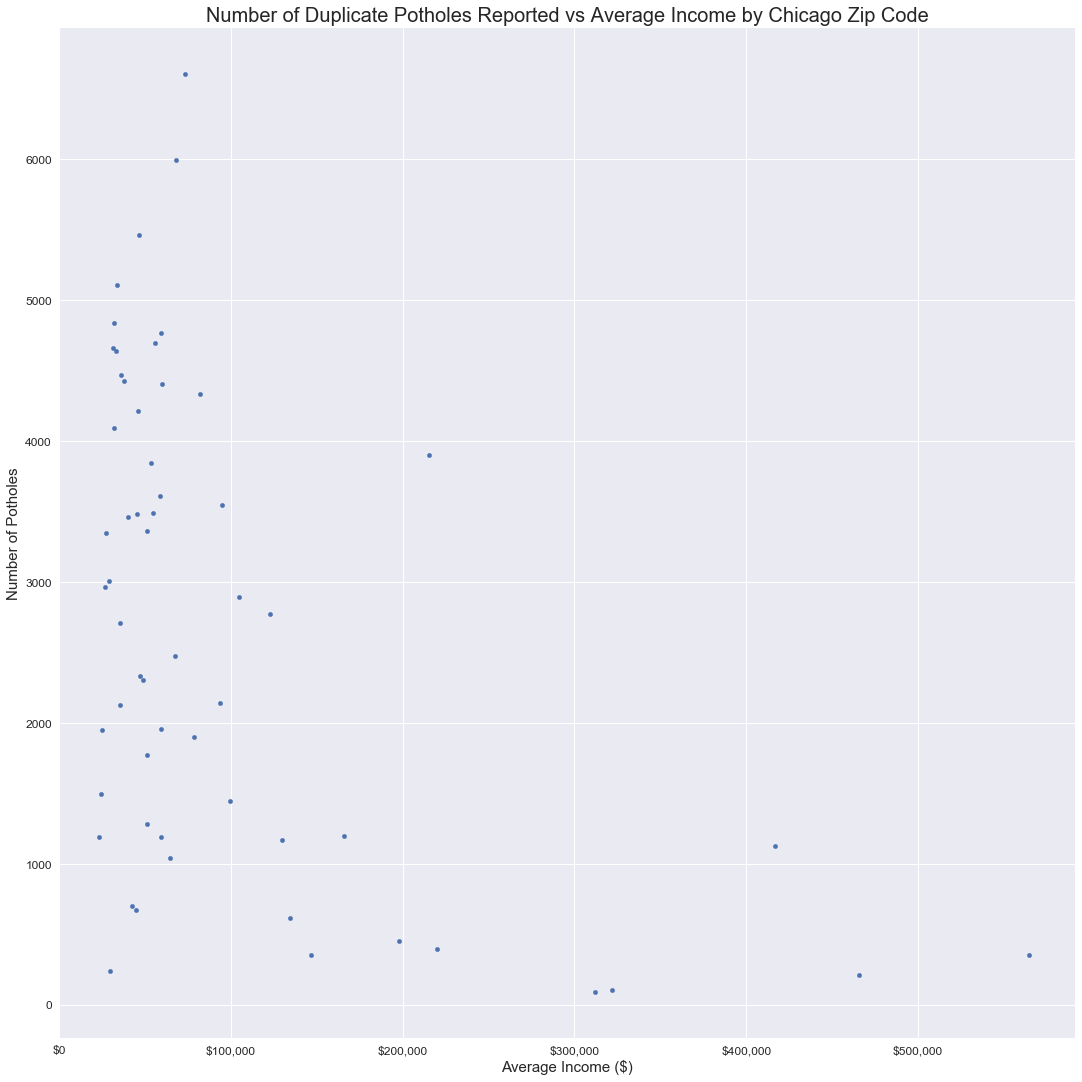

In [97]:
ax = dupes_by_zipcode_with_income.plot('avg_income', 'ZIP', 'scatter', figsize=(15,15));
ax.set_title('Number of Duplicate Potholes Reported vs Average Income by Chicago Zip Code', fontsize=20)
ax.set_xlabel('Average Income ($)', fontsize=15)
ax.set_ylabel('Number of Potholes', fontsize=15)
ax.tick_params(labelsize=12);
ax.set_xlim(left=0);
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')));
ax.figure.tight_layout(pad=0.5);
ax.figure.savefig('duplicate_potholes_vs_income.png');

In [59]:
# get days requests sit open
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,LONGITUDE,LOCATION,COMPLETE,is_dupe,WORK DURATION,WAITING TIME,WAITING DAYS,WORK DAYS,WORK_DAYS,mra
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2 days,NaT,0,2,2,Pothole Patched
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2 days,NaT,0,2,2,Pothole Patched
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2 days,NaT,0,2,2,Pothole Patched
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2 days,NaT,0,2,2,Pothole Patched
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2 days,NaT,0,2,2,Pothole Patched


In [60]:
open_requests = deduped[(deduped['COMPLETE'] == False) & (deduped['STATUS'] == 'Open')]

In [61]:
open_requests = open_requests[['ZIP', 'WAITING DAYS']]

In [62]:
aggregated_open_requests = open_requests.groupby('ZIP').agg(['mean', 'count']).drop(0)

In [63]:
aggregated_open_requests.index = aggregated_open_requests.index.astype(int)

In [64]:
aggregated_open_requests.head()

WAITING DAYS      
              mean count
ZIP                     
60601     7.000000     1
60604     4.000000     1
60605     4.500000     2
60607    13.666667    12
60608    13.555556    27

In [65]:
aggregated_open_requests.sort_values(by=[('WAITING DAYS', 'mean')], ascending=False)

WAITING DAYS      
              mean count
ZIP                     
60640   101.222222    18
60613    72.125000     8
60657    29.666667     6
60624    23.954545    22
60666    23.000000     1
60612    22.820513    39
60623    19.085714    35
60651    18.950000    20
60618    18.344828    29
60628    18.272727    22
60644    16.391304    23
60639    16.028571    35
60647    15.363636    11
60630    13.772727    22
60607    13.666667    12
60608    13.555556    27
60619    13.400000    25
60617    13.380952    42
60625    13.181818    11
60614    12.833333     6
60634    12.136364    22
60641    12.076923    26
60620    11.588235    17
60622    11.500000    12
60707    11.200000    10
60652    10.833333     6
60615    10.300000    10
60633    10.285714     7
60643     9.428571    14
60610     8.750000     4
60637     8.083333    12
60656     7.888889     9
60638     7.500000     6
60642     7.400000    10
60649     7.111111     9
60646     7.000000    10
60601     7.000000     1
60631     6.906977    43
60827     6.666667     3
60616     6.500000     2
60654     6.500000     2
60659     6.250000     4
60611     6.166667     6
60632     6.058824    17
60645     6.000000     4
60661     6.000000     1
60636     6.000000     3
60655     5.833333     6
60621     5.800000     5
60626     5.666667     3
60609     5.666667     3
60653     5.500000     2
60629     5.000000     2
60660     5.000000     7
60605     4.500000     2
60604     4.000000     1

In [66]:
aggregated_open_requests_plot = open_requests.groupby('ZIP').mean().drop(0)

In [67]:
joined_open = pd.merge(aggregated_open_requests_plot, income_by_zipcode, left_index=True, right_index=True)

In [68]:
joined_open.head()

,WAITING DAYS,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
60601,7.000000,7560.0,1664704.0,2850.0,223912.0,220198,78565.614035
60604,4.000000,620.0,349923.0,260.0,194197.0,564391,746911.538462
60605,4.500000,13420.0,1802855.0,4260.0,117039.0,134340,27473.943662
60607,13.666667,13240.0,1722638.0,3750.0,85153.0,130108,22707.466667
60608,13.555556,30830.0,1249844.0,1970.0,13967.0,40539,7089.847716


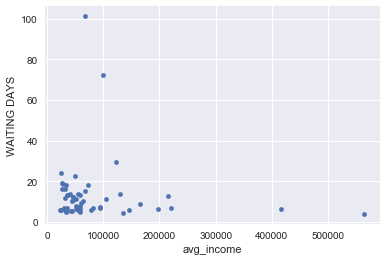

In [69]:
joined_open.plot('avg_income', 'WAITING DAYS', 'scatter');

In [70]:
# overlap in top 1% income and top 1% capital gains

In [71]:
income_by_zipcode.drop(0)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
1001,8950.0,504774.0,1260.0,6717.0,56399,5330.952381
1002,9670.0,796475.0,2950.0,57274.0,82365,19414.915254
1005,2300.0,138309.0,330.0,2124.0,60134,6436.363636
1007,7490.0,537509.0,1300.0,10447.0,71763,8036.153846
1008,620.0,40213.0,90.0,328.0,64859,3644.444444
1010,1820.0,134902.0,320.0,2759.0,74121,8621.875000
1011,620.0,32610.0,40.0,100.0,52596,2500.000000
1012,360.0,22939.0,70.0,488.0,63719,6971.428571
1013,10500.0,431761.0,670.0,3724.0,41120,5558.208955


In [72]:
one_perc_count = round(income_by_zipcode.shape[0] * .01)

In [73]:
one_perc_count

277

In [74]:
income_by_zipcode.shape[0]

27683

In [75]:
top_income = income_by_zipcode.sort_values('avg_income', ascending=False).iloc[:one_perc_count]

In [76]:
top_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
94104,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05


In [77]:
top_cap_gains = income_by_zipcode.sort_values('avg_capital_gains', ascending=False).iloc[:one_perc_count]

In [78]:
top_cap_gains.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
7102,4400.0,781441.0,230.0,486407.0,177600,2.114813e+06
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05


In [79]:
top_both = pd.merge(top_cap_gains, top_income, left_index=True, right_index=True)

In [80]:
top_both.head()

,num_with_income_x,total_income_amount_x,num_with_capital_gains_x,total_capital_gains_x,avg_income_x,avg_capital_gains_x,num_with_income_y,total_income_amount_y,num_with_capital_gains_y,total_capital_gains_y,avg_income_y,avg_capital_gains_y
zipcode,,,,,,,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
83014,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05


In [81]:
top_both.index.values

array([33109, 33480, 76102, 94027, 83014, 94301, 60604, 94104, 55402,
       83025,  2493, 20184, 94111, 34102, 10005,  2116, 13152, 10577,
       90067,  6830, 89109, 60022, 10065, 94129, 28207, 94028,  6831,
       11733, 10013, 75201,  2199, 60093, 33154, 94304, 10019, 10018,
       10021, 60602, 10075, 94022,  2110, 89413, 33140, 90049, 90402,
       78746, 63124, 11568, 10028, 60043,  7976, 78701, 75205,  2108,
       33432,  6878, 10580, 60611, 94062, 90210, 93108, 77024, 98039,
       29482, 10022, 94105,  2481, 10014, 89451,  2465, 10128, 11976,
       32963, 77002,  6870, 19035, 95032, 94920, 11771,  2467, 10017,
       34103, 33301, 10708, 94946, 90077,  2109, 11765, 75225, 19085,
       10004, 94025,  6840, 77056, 33477, 33483, 33316, 94010,  2030,
       10528, 66211, 15142, 10011, 33156, 19041, 33496,  7931, 90272,
       10069, 92625, 60603, 78733, 77019, 78703, 60521, 10583,  6820,
       92657, 55391, 60606, 11560, 85253, 58847,  2445, 34108,  7627,
        6880, 60045,

In [1]:
## get lat lng of zip codes
# source: https://www.census.gov/geo/maps-data/data/gazetteer2017.html

zip_codes = pd.read_csv('data/2017_Gaz_zcta_national.txt', sep='\t')

NameError: name 'pd' is not defined

In [83]:
zip_codes.head()

,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,601,166659745,799293,64.348,0.309,18.180555,-66.749961
1,602,79307535,4428428,30.621,1.710,18.361945,-67.175597
2,603,81884707,183895,31.616,0.071,18.455183,-67.119887
3,606,109579998,12487,42.309,0.005,18.158345,-66.932911
4,610,93013427,4172060,35.913,1.611,18.295366,-67.125135


In [84]:
zip_codes.dtypes

GEOID                                                                                                                                            int64
ALAND                                                                                                                                            int64
AWATER                                                                                                                                           int64
ALAND_SQMI                                                                                                                                     float64
AWATER_SQMI                                                                                                                                    float64
INTPTLAT                                                                                                                                       float64
INTPTLONG                                                                                     

In [85]:
zip_codes.drop(['ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI'], axis=1, inplace=True)

In [86]:
zip_codes.head()

,GEOID,INTPTLAT,INTPTLONG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [87]:
zip_codes.rename(columns={
    'GEOID': 'zipcode',
    'INTPTLAT': 'lat',
    zip_codes.columns[2]: 'lng'
}, inplace=True)

In [88]:
zip_codes.head()

,zipcode,lat,lng
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [89]:
top_both_df = pd.DataFrame({'zipcode': top_both.index.values})

In [90]:
top_both_df.head()

,zipcode
0,33109
1,33480
2,76102
3,94027
4,83014


In [91]:
top_both_df.set_index('zipcode', inplace=True)

In [92]:
top_both_lat_lng = pd.merge(top_both_df, zip_codes, left_index=True, right_on='zipcode')

In [93]:
top_both_lat_lng.head()

,zipcode,lat,lng
10729,33109,25.756717,-80.140066
10867,33480,26.684952,-80.037235
26330,76102,32.759104,-97.329756
30965,94027,37.453514,-122.204756
28486,83014,43.448605,-110.966862


In [94]:
from mpl_toolkits.basemap import Basemap

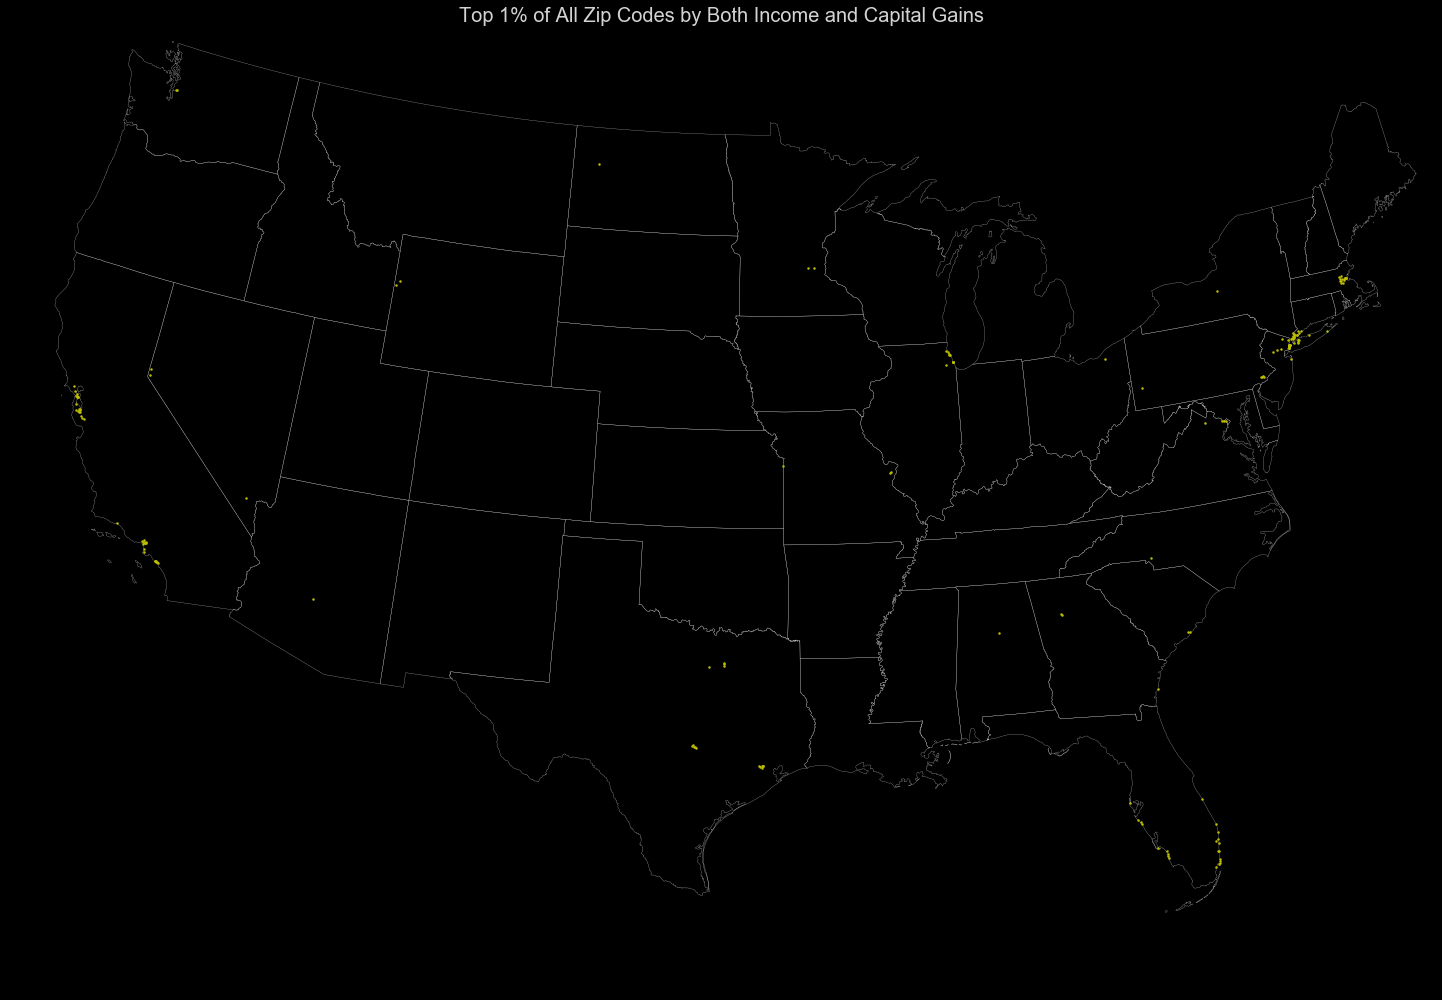

In [95]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_both_lat_lng['lat']
    lons = top_both_lat_lng['lng']
    
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.y', markersize=5)
        
    plt.annotate('Top 1% of All Zip Codes by Both Income and Capital Gains', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)
    fig.tight_layout(pad=0.5)
    fig.savefig('top_1_pct_income_and_capital_gains.png')

In [96]:
zip_code_with_ltln = pd.merge(income_by_zipcode, zip_codes, left_index=True, right_on='zipcode')

# top by income

# top by capital gains

# bottom by income

# bottom by capital gains

In [97]:
zip_code_with_ltln.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
142,8950.0,504774.0,1260.0,6717.0,56399,5330.952381,1001,42.062368,-72.625754
143,9670.0,796475.0,2950.0,57274.0,82365,19414.915254,1002,42.364060,-72.458741
145,2300.0,138309.0,330.0,2124.0,60134,6436.363636,1005,42.418848,-72.106598
146,7490.0,537509.0,1300.0,10447.0,71763,8036.153846,1007,42.279010,-72.400468
147,620.0,40213.0,90.0,328.0,64859,3644.444444,1008,42.190191,-72.954263


In [98]:
zip_codes[zip_codes['zipcode'] == 1001]

,zipcode,lat,lng
142,1001,42.062368,-72.625754


In [99]:
top_income = zip_code_with_ltln.sort_values('avg_income', ascending=False).iloc[:one_perc_count]
top_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
10729,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,33109,25.756717,-80.140066
30965,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,94027,37.453514,-122.204756
10867,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,33480,26.684952,-80.037235
31015,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05,94301,37.444131,-122.149917
30989,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05,94104,37.791412,-122.402129


In [100]:
bottom_income = zip_code_with_ltln.sort_values('avg_income').iloc[:one_perc_count]
bottom_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
15502,210.0,1616.0,0.0,0.0,7695,NaN,47406,39.177797,-86.515448
22273,150.0,2062.0,0.0,0.0,13746,NaN,64147,38.851782,-94.554647
28878,420.0,6180.0,50.0,69.0,14714,1380.0,84112,40.765076,-111.841478
19683,110.0,1923.0,0.0,0.0,17481,NaN,57794,43.124034,-102.394843
12362,2260.0,41860.0,0.0,0.0,18522,NaN,38126,35.126968,-90.043659


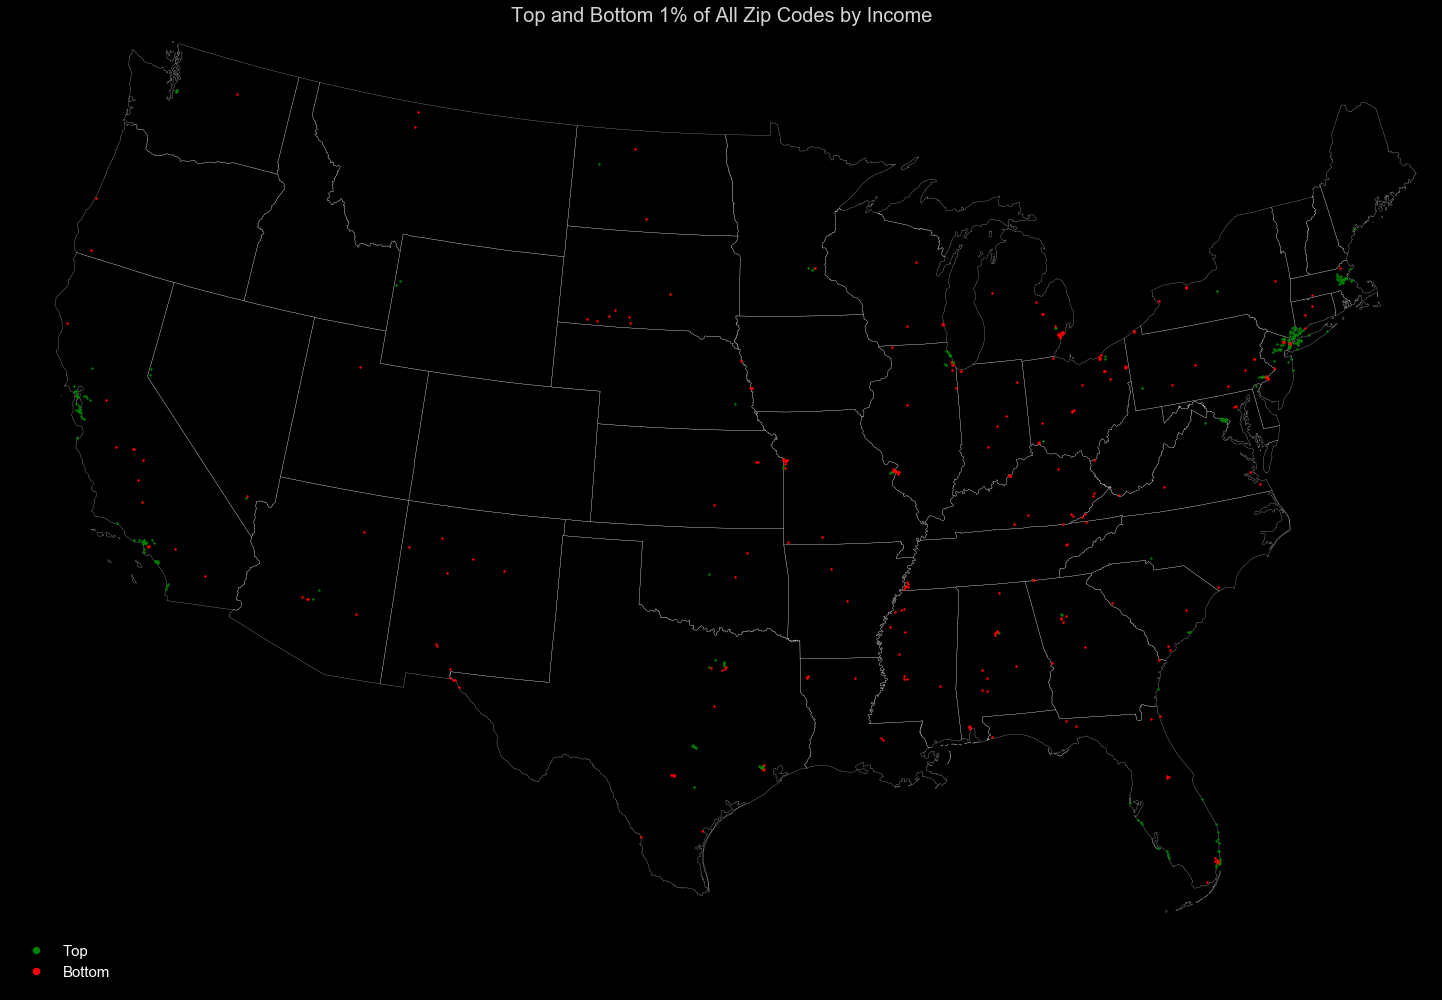

In [101]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_income['lat']
    lons = top_income['lng']
    
    label = 'Top'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.g', markersize=5, label=label)
        label=None
        
    lats = bottom_income['lat']
    lons = bottom_income['lng']
    
    label = 'Bottom'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.r', markersize=5, label=label)
        label = None
        
    plt.annotate('Top and Bottom 1% of All Zip Codes by Income', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)
    plt.legend(loc='lower left', fontsize=15, markerscale=3)
    fig.tight_layout(pad=0.5)
    fig.savefig('top_and_bottom_1_pct_income.png')

In [102]:
top_10_income = zip_code_with_ltln.sort_values('avg_income', ascending=False).iloc[:10]
bottom_10_income = zip_code_with_ltln.sort_values('avg_income').iloc[:10]

In [103]:
top_10_income

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
10729,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,33109,25.756717,-80.140066
30965,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,94027,37.453514,-122.204756
10867,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,33480,26.684952,-80.037235
31015,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05,94301,37.444131,-122.149917
30989,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05,94104,37.791412,-122.402129
2723,1610.0,1585609.0,980.0,373087.0,984850,3.807010e+05,10577,41.038367,-73.711114
5955,2020.0,1951274.0,1390.0,249193.0,965977,1.792755e+05,19035,40.051349,-75.277642
30078,3280.0,3007211.0,2020.0,743083.0,916832,3.678629e+05,90067,34.057597,-118.413998
20455,1220.0,1061793.0,850.0,202511.0,870322,2.382482e+05,60043,42.088859,-87.714588
579,5140.0,4467755.0,3410.0,1752109.0,869213,5.138150e+05,2493,42.360502,-71.303433


In [104]:
bottom_10_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
15502,210.0,1616.0,0.0,0.0,7695,NaN,47406,39.177797,-86.515448
22273,150.0,2062.0,0.0,0.0,13746,NaN,64147,38.851782,-94.554647
28878,420.0,6180.0,50.0,69.0,14714,1380.0,84112,40.765076,-111.841478
19683,110.0,1923.0,0.0,0.0,17481,NaN,57794,43.124034,-102.394843
12362,2260.0,41860.0,0.0,0.0,18522,NaN,38126,35.126968,-90.043659


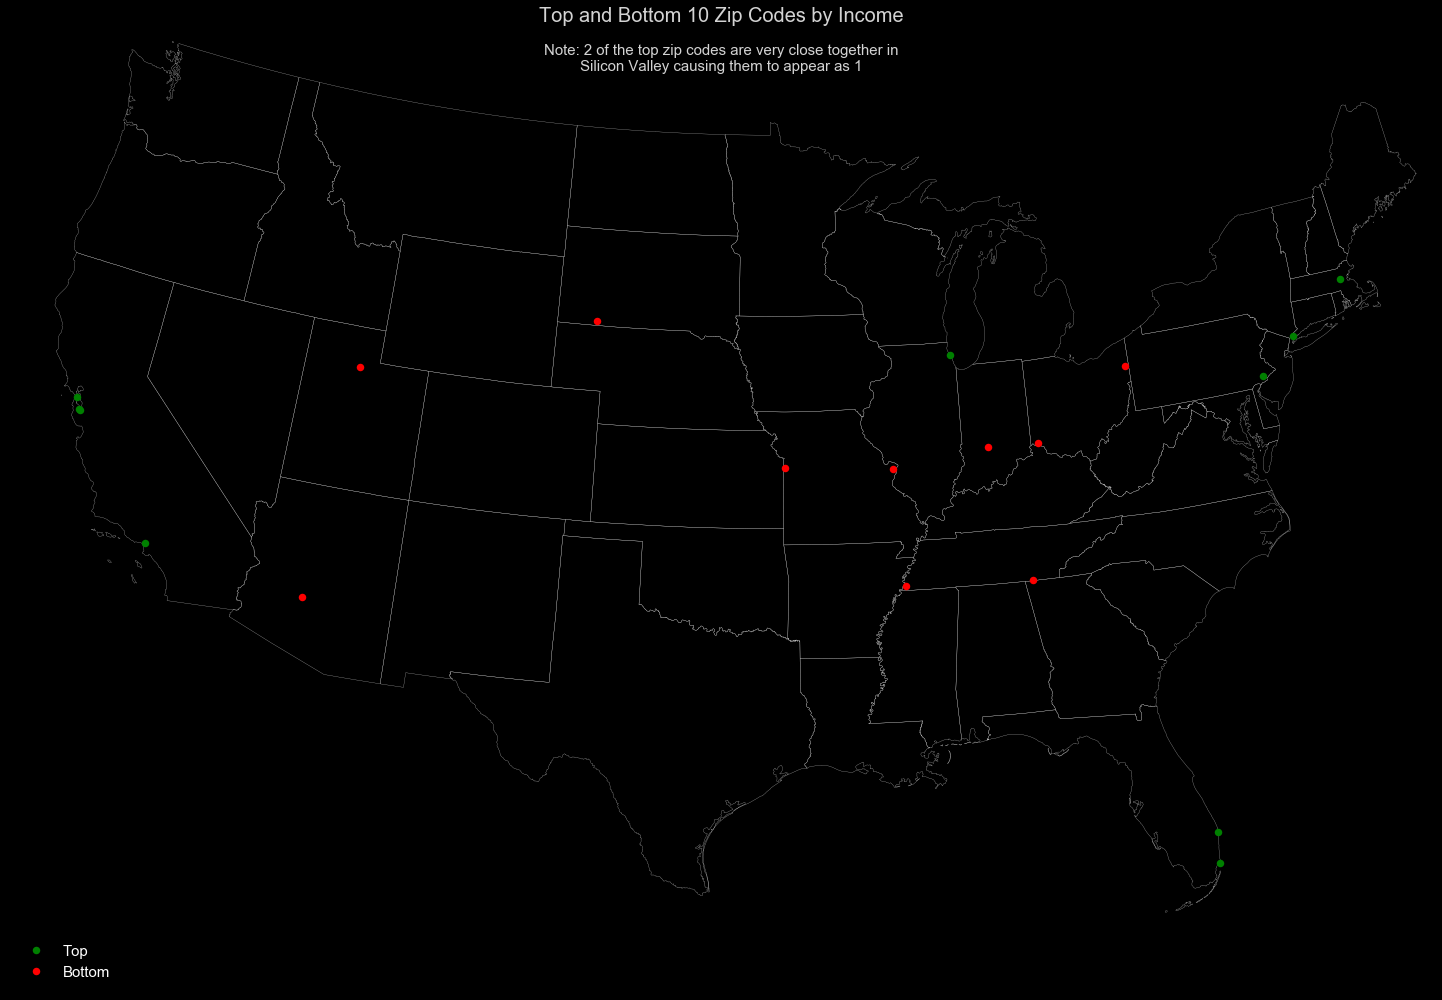

In [105]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_10_income['lat']
    lons = top_10_income['lng']
    
    markersize = 15
    
    label = 'Top'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.g', markersize=markersize, label=label)
        label=None
        
    lats = bottom_10_income['lat']
    lons = bottom_10_income['lng']
    
    label='Bottom'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.r', markersize=markersize, label=label)
        label=None
        
    plt.legend(fontsize=15, loc='lower left')
    plt.annotate('Top and Bottom 10 Zip Codes by Income', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)
    plt.annotate('Note: 2 of the top zip codes are very close together in\nSilicon Valley causing them to appear as 1', color='lightgray', xy=(.5, .95), ha='center', xycoords='axes fraction', fontsize=15)
    fig.tight_layout(pad=0.5)
    fig.savefig('top_and_bottom_10_income.png')

In [106]:
zip_code_with_ltln.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
142,8950.0,504774.0,1260.0,6717.0,56399,5330.952381,1001,42.062368,-72.625754
143,9670.0,796475.0,2950.0,57274.0,82365,19414.915254,1002,42.364060,-72.458741
145,2300.0,138309.0,330.0,2124.0,60134,6436.363636,1005,42.418848,-72.106598
146,7490.0,537509.0,1300.0,10447.0,71763,8036.153846,1007,42.279010,-72.400468
147,620.0,40213.0,90.0,328.0,64859,3644.444444,1008,42.190191,-72.954263


In [107]:
new_df = zip_code_with_ltln.sort_values(['avg_income'])[['avg_income']]
new_df.head()

,avg_income
15502,7695
22273,13746
28878,14714
19683,17481
12362,18522


In [108]:
new_df = new_df.reset_index(drop=True)

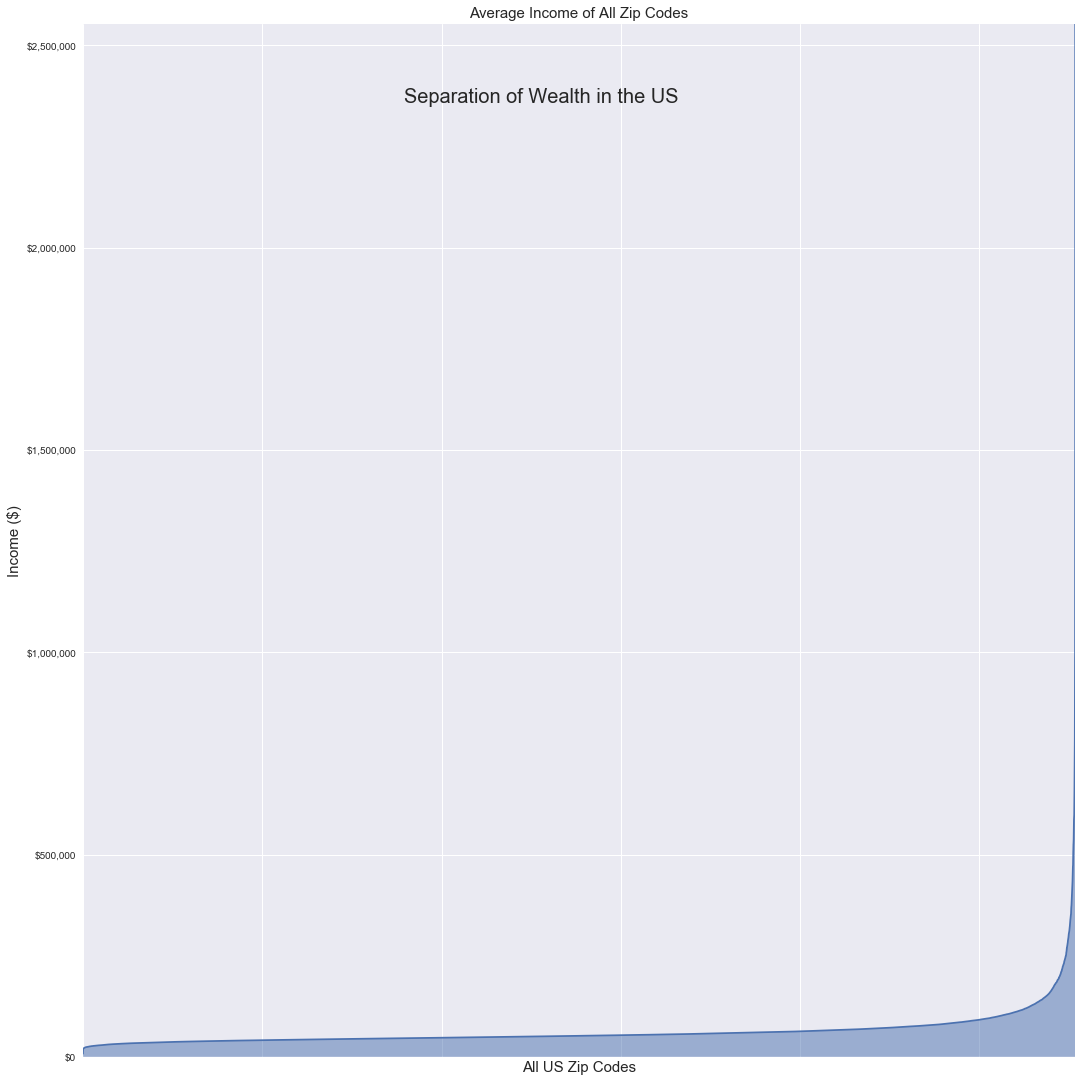

In [109]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.margins(0)

ax.plot(new_df);
ax.fill_between(new_df.index, 0, new_df['avg_income'], alpha=.5);
ax.set_ylabel('Income ($)', fontsize=15);
ax.tick_params('x', labelbottom=False)
ax.set_xlabel('All US Zip Codes', fontsize=15);
fig.suptitle('Separation of Wealth in the US', fontsize=20, y=.92)
ax.set_title('Average Income of All Zip Codes', fontsize=15);
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
fig.tight_layout(pad=0.5)
fig.savefig('separation_of_wealth_by_zipcode.png')